# Lab Week 3: The mathematical building blocks of neural networks

This lab is based on the materials of the second chapter the course text book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff) (See D2l -> Course Information -> Text Book.)

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the MNIST dataset in Keras

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images_orig, train_labels), (test_images_orig, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_images_orig.shape # the shape is (b, w, h)

(60000, 28, 28)

In [ ]:
train_images_orig.ndim

3

## The shape of image data

**Note:** For black-and-white images, the number of channels equals 1, so it is not explicitly mentioned in the data.

- color images shape: (samples_n, channel_n, hight, width)
- gray images shape: (sample_n, hight, width)


![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/image_data.png)

## Exploring the dataset

sample image shape:  (28, 28)
sample image data type:  <class 'numpy.ndarray'>
printing the numerical value of a sample image
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  15 139 174 253 254
  218 139  14   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 103 211 252 252 217 168
  168 246 184  14   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 150 253 252 180 100  12   0
    0 135 252  95   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 140 253 169   7   0   0   0
    0 197 252 121   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  18 147  

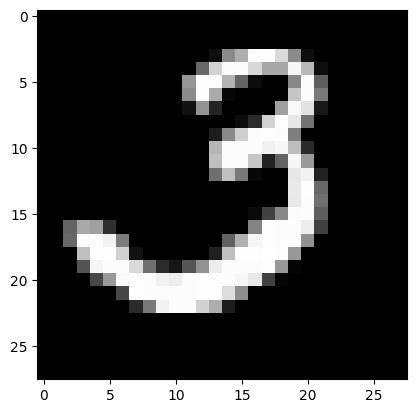

In [ ]:
# Note: run this cell multiple times
index = np.random.randint(0, 60000)
sample_image = train_images_orig[index]

print("sample image shape: ", sample_image.shape)
print("sample image data type: ", type(sample_image))

print("=" * 100)
print("printing the numerical value of a sample image")
print(sample_image)

# aligning the pixel values in the output
print("=" * 100)
for row in sample_image:
  print("".join([str(elem).ljust(3) for elem in row]))

print("=" * 100)
plt.imshow(sample_image, cmap="gray")
plt.show()


In [ ]:
len(train_labels)

60000

In [26]:
train_labels #Binary or multi-class classification hear? Multi-calss classification

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
test_images_orig.shape

(10000, 28, 28)

In [24]:
len(test_labels)

10000

In [25]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

### **Exercise 1:** Display the fourth image in the `test set` with its label.

label: 0


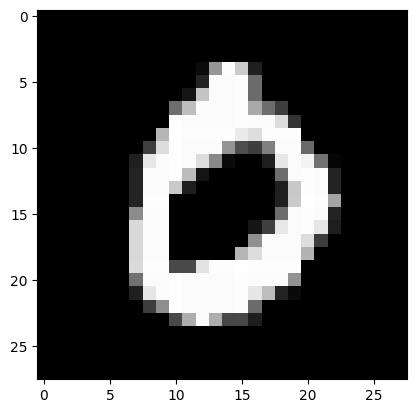

In [27]:
print(f"label: {test_labels[3]}")
plt.imshow(test_images_orig[3], cmap="gray") #optional cmap="gray"
plt.show()                                    #But it is in line with the concept of reducing the amount of data in an image
                                              #to only the data that hepd the algorithm determin the anser/label/target
plt.show()

# A first look at a neural network

## **Step 1:** The network architecture

In [28]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([ #Similar to when we used a construction from sklearn using ... new DecisionTreeClassifier()
                          #WE've chosen 512 nodes for the hidden layer (1st Denise layer)
                          #Faster converge (updates the weights) during training
                           # only 10 nodes in the last Dense layer - 1 dummy valu for each possible label
                           #exponential scaled - bigger values get exponential bigger - smaller value get exponential smalller
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

<img src="https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/architecture.png" width="1000" height="400">

### **Input layer** - Preparing the image data

**Note: The nodes in the `Input layer` are not neurons. They are pixel values.**

In [ ]:
train_images = train_images_orig.reshape((60000, 28 * 28))

#WE want to normalize the data by dividing by total value so we can get
#each value as aa number between 0 and 1
#MAke it more efficient to train and update weights
train_images = train_images.astype("float32") / 255

test_images= test_images_orig.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

### **Exercise 2:** What is the shape of data after preprocessing

In [30]:
#your code here
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


### Tensor reshaping

In [33]:
a = np.array([[0., 1.],
             [2., 3.],
             [4., 5.]])
a.shape

(3, 2)

### **Exercise 3:** reshape the `a` matrix to 6 x 1 matrix.

In [34]:
#Did not flatten here - We only did a general reshaping
#BEcause original 2D tensor -> Reshaped 2D tensor
reshaped_array = original_array.reshape((6, 1))
print(reshaped_array.shape)

(6, 1)


### **Hidden layer** with `relu` activation function

Each neuron in the hidden layer, as illustrated in the figure below, comprises two main components: the summation function and the activation function.

In our architecture, we have 512 neurons in the hidden layer.

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/relu.webp with="500" height="300">

**The preferred activation function for hidden layers is `relu`. The mathematical function of ReLU is as follows:**

$$
relu(x) = max(0, x)
$$

> **Note: ReLU is considered as one of the biggest breakthroughs in deep learning because ReLU makes it possible to train a very deep neural network. It has solved the `vanishing gradient` challenge in `deep` networks with many hidden layers.**


### **Exercise 4** Write a function that takes a number/array `x` and returns `relu(x)`. Use the `np.maximum()` method in your function. Then, plot this function for x in the range of -5 to 5.

In [48]:
#Define a ReLu function(Rectifies Linear Unit - One efficient (but simple) activation function)
def relu(x):
  #It classifies anything zero or less as output zero
  #IT classifies anything more than zero as the original value
  output = np.maximum(0, x) #You can perform numpy operations over single values or tensors because of ... B
  return output

  #Plot this function for x in the range of -5, 5
  x=np.linspace(-5,5,100) #Remmener when we did we use this: Linear Regression - line of best fit
  y=relu(x)
  plt.figure()
  plt.plot(x, y)
  plt.show()



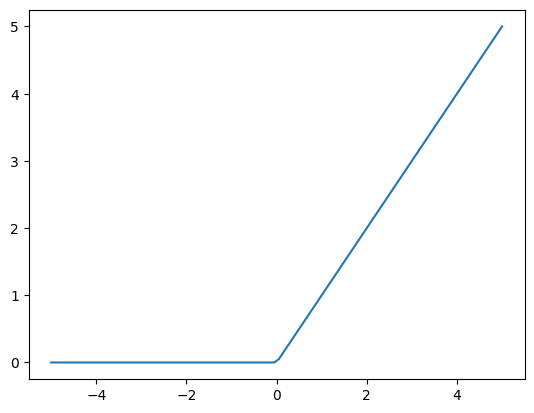

In [ ]:
# my solution output

### **Ecercise 5:** Suppose that I have 5 neurons in my hidden layer. After the summation stage, the result of this layer is `[-10, 5, 0, -2, 6]`. What is the result after passing this through the ReLU activation function?

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-relu.png)

your answer here:

### **Output layer** - `Sigmoid` and `Softmax` activation function

Each neuron in the last layer of the neural network should output a number between 0 and 1 because each neuron represents the probability of the input belonging to a specific class.

**Important Note:** The values of the neurons in the last layer before applying the activation function are called `logits` or `scores`.

One way to achieve this is by using the sigmoid activation function.

The sigmoid function takes an input
`x` and outputs a number between 0 and 1.

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

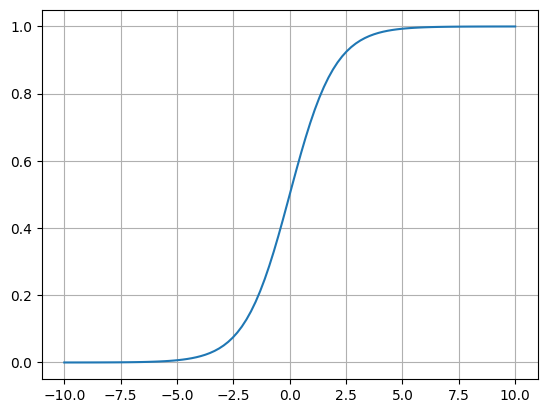

In [40]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.grid()
plt.show()

### **Exercise 6:** Using the sigmoid function defined in the previous cell, suppose the last layer of a neural network has 4 neurons with the following values: [3.2, 1.3, 0.2, 0.8].
  - Apply the sigmoid function to these values to map them to numbers between 0 and 1.
  - Then, generate a bar plot of the scaled values.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-sigmoid.png)

[0.96083428 0.78583498 0.549834   0.68997448]


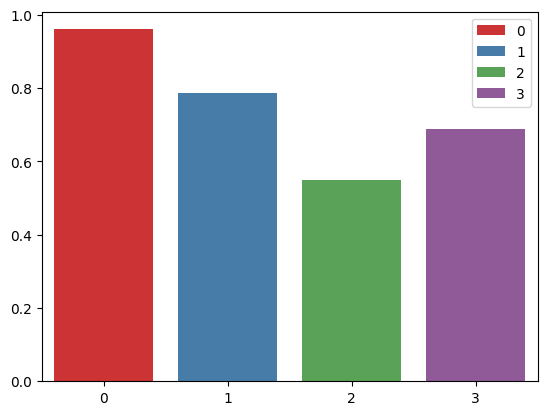

In [44]:
# we call value of the last layer before applying activation func as logits
logits = np.array([3.2, 1.3, 0.2, 0.8])
#your code here
logits_scaled = sigmoid(logits)
print(logits_scaled)

#you code here for plotting
sns.barplot(x=np.arange(4), y=logits_scaled, hue=np.arange(4), palette='Set1')
plt.xticks(np.arange(4))
plt.show()

[0.96083428 0.78583498 0.549834   0.68997448]


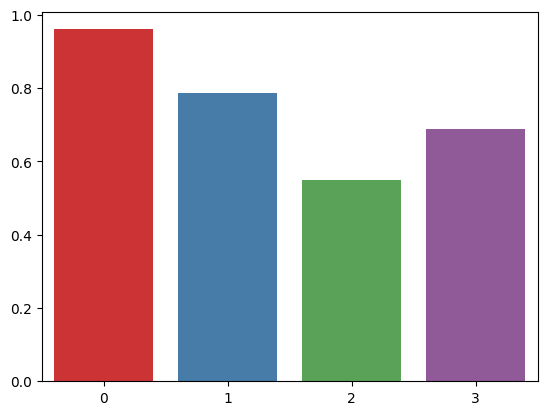

In [ ]:
#my solution output

This plot shows the probability distribution over labels. However, there is an issue here: with the sigmoid function, each output is independent and bounded between 0 and 1, but their sum is not constrained to equal 1. To address this, we use the softmax function, which normalizes the outputs so that they sum to 1, ensuring a valid probability distribution over the labels.


$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^N e^{x_j}}
$$

In [49]:
def softmax(x):
  """
  input x is a vector representing the output of the last layer of a neural network
  """

  return np.exp(x)/sum(np.exp(x))

### **Exercise 7:** Pass the logits defined in Exercise 6 from the softmax function and plot the probability distribution over the labels.

![](https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/pass-softmax.png)

In [50]:
#your code here
logits = np.array([3.2, 1.3, 0.2, 0.8])
probabilities = softmax(logits)
print(probabilities)

[0.77514955 0.11593805 0.03859242 0.07031998]


[0.77514955 0.11593805 0.03859242 0.07031998]
sum of all probs:  1.0000000000000002


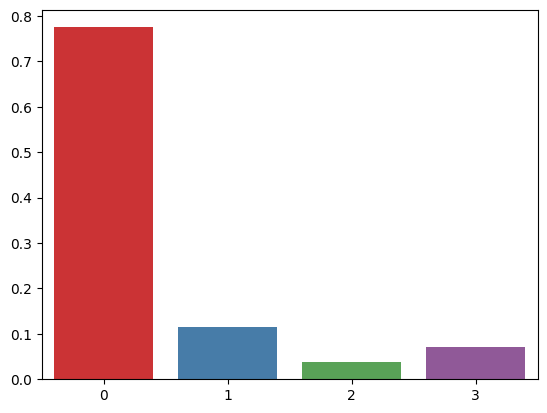

In [ ]:
#my solution output

### Exercise 8: Given the `probs` you calculated in the previous Exercise, find the predicted label using `np.argmax()` method.

In [52]:
#your code here
predicted_class = np.argmax(probabilities)
print(f"Predicted Label: {predicted_class}")

Predicted Label: 0


> **To summarize so far, the input to the neural network is, for example, an image, and the output is the probability distribution over the labels.**

> **You can try [Google Teachable Machine](https://teachablemachine.withgoogle.com/train/image) to explore this concept further.**

<img src=https://raw.githubusercontent.com/PyDataGBC/PyML2025/refs/heads/main/LabWeek3/assets/overal_logit-softmax.png height="650" width="650" >




In the next steps, we will train the neural network defined in step 1. By training the network, we optimize the weights between the neurons.

## **Step 2:** The compilation step

In [53]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## **Step 3:** "Fitting" the model

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8736 - loss: 0.4464
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9649 - loss: 0.1159
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9793 - loss: 0.0678
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9846 - loss: 0.0515
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9888 - loss: 0.0380


## **Step 4:** Using the model to make predictions

In [54]:
test_digits = test_images[:3] #predictiong the label of test_image[0] , test_image[1], test_image[2]
predictions = model.predict(test_digits)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step


array([[0.06595194, 0.09519071, 0.0708834 , 0.12238   , 0.16215998,
        0.11549469, 0.05707217, 0.12886213, 0.06518305, 0.11682197],
       [0.07406669, 0.12968814, 0.06932531, 0.18073459, 0.1380012 ,
        0.07156878, 0.03902494, 0.10988715, 0.08928949, 0.09841365],
       [0.07844234, 0.11685508, 0.09669288, 0.12184312, 0.11282839,
        0.10898764, 0.05867962, 0.1227511 , 0.0877433 , 0.09517649]],
      dtype=float32)

### **Exercise 9:** Interpret the values in the `prediction`array.  

your answer here:

### See the result for the prediction of the first image

In [55]:
print(predictions[0])
predicted_label = np.argmax(predictions[0])
print("Predicted label: ", predicted_label)

[0.06595194 0.09519071 0.0708834  0.12238    0.16215998 0.11549469
 0.05707217 0.12886213 0.06518305 0.11682197]
Predicted label:  4


In [56]:
print("highest prob: ", predictions[0][7])

highest prob:  0.12886213


In [57]:
true_label = test_labels[0]
print("True label: ", true_label)

True label:  7


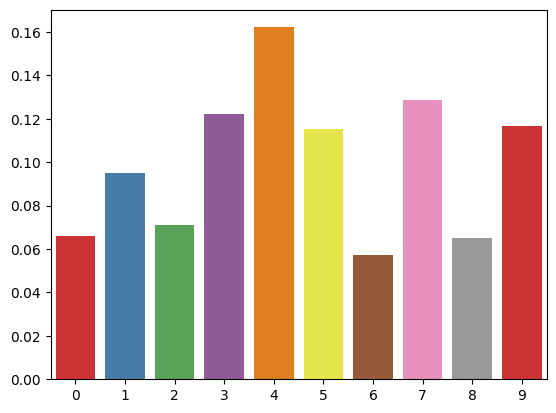

In [58]:
# plt.bar(np.arange(10), predictions[0])
sns.barplot(x=np.arange(10), y=predictions[0], hue=np.arange(10), palette='Set1', legend=False)
plt.xticks(np.arange(10))
plt.show()

> **So, the output distribution of the model is very close to our ideal distribution, which is [0, 0, 0, 0, 0, 0, 0, 1, 0, 0].**



### **Exercise 10:** Predict the label of the fourth element of the test set.

**Important Note: Neural networks are designed to predict labels for a batch of data. For example, in the previous section, we predicted labels for a batch of four images, where the input shape was (4, 784). Similarly, when working with a single image, it must be fed into the network in the batch format with a shape of (1, 784).**

In [61]:
#your code here
test_set = np.random.rand(100, 784)  # 100 test images, each flattened to 784 pixels


fourth_image = test_set[3]  # Index 3 because indexing starts at 0

#Reshape to batch format (1, 784)
fourth_image_batch = fourth_image.reshape(1, -1)

#ass through the neural network to get logits

logits = np.random.rand(1, 10)  # Simulating network output for 10 classes

# Apply softmax to logits (if not already done by the model)
probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

# Predict the label
predicted_label = np.argmax(probabilities)

print(f"Predicted Label: {predicted_label}")

Predicted Label: 6


## **Step 5:** Evaluating the model on new data

In [62]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0892 - loss: 2.4068
test_acc: 0.08070000261068344


**Note:** We will discuss `optimizer`, `loss`, `epoch`, and `batch` in more depth in the coming weeks.